In [1]:
# Linear Regression
import os
print (os.getcwd())
os.chdir("C://Digital Nest/Naive Bayes")
print (os.getcwd())

C:\Users\Vishnu Murthy Chakka
C:\Digital Nest\Naive Bayes


In [2]:
import numpy as np
import pandas as pd
mushroom = pd.read_csv('mushroom.csv')
mushroom.describe()

,Typeofmushroom,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,...,stalksurfacebelowring,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat
count,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,...,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,EDIBLE,CONVEX,SCALY,BROWN,NO,NONE,FREE,CLOSE,BROAD,BUFF,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,WHITE,SEVERAL,WOODS
freq,4488,3796,3268,2320,5040,3808,8200,6824,5880,1728,...,5076,4744,4640,8416,8216,7768,3968,2424,4064,3160


In [3]:
print(mushroom.columns.values)

['Typeofmushroom' 'capshape' 'capsurface' 'capcolor' 'bruises' 'odor'
 'gillattachment' 'gillspacing' 'gillsize' 'gillcolor' 'stalkshape'
 'stalkroot' 'stalksurfaceabovering' 'stalksurfacebelowring'
 'stalkcolorabovering' 'stalkcolorbelowring' 'veiltype' 'veilcolor'
 'ringnumber' 'ringtype' 'sporeprintcolor' 'population' 'habitat']


In [4]:
# find missing values
mushroom.isnull().sum()

Typeofmushroom           0
capshape                 0
capsurface               0
capcolor                 0
bruises                  0
odor                     0
gillattachment           0
gillspacing              0
gillsize                 0
gillcolor                0
stalkshape               0
stalkroot                0
stalksurfaceabovering    0
stalksurfacebelowring    0
stalkcolorabovering      0
stalkcolorbelowring      0
veiltype                 0
veilcolor                0
ringnumber               0
ringtype                 0
sporeprintcolor          0
population               0
habitat                  0
dtype: int64

In [5]:
# check if there are any invalid values
for i in range(0,22,1):
    print(mushroom.columns.values[i])
    print(np.unique(mushroom.iloc[::,i:i+1:1]))

Typeofmushroom
['EDIBLE' 'POISONOUS']
capshape
['BELL' 'CONICAL' 'CONVEX' 'FLAT' 'KNOBBED' 'SUNKEN']
capsurface
['FIBROUS' 'GROOVES' 'SCALY' 'SMOOTH']
capcolor
['BROWN' 'BUFF' 'CINNAMON' 'GRAY' 'GREEN' 'PINK' 'PURPLE' 'RED' 'WHITE'
 'YELLOW']
bruises
['BRUISES' 'NO']
odor
['ALMOND' 'ANISE' 'CREOSOTE' 'FISHY' 'FOUL' 'MUSTY' 'NONE' 'PUNGENT'
 'SPICY']
gillattachment
['ATTACHED' 'FREE']
gillspacing
['CLOSE' 'CROWDED']
gillsize
['BROAD' 'NARROW']
gillcolor
['BLACK' 'BROWN' 'BUFF' 'CHOCOLATE' 'GRAY' 'GREEN' 'ORANGE' 'PINK' 'PURPLE'
 'RED' 'WHITE' 'YELLOW']
stalkshape
['ENLARGING' 'TAPERING']
stalkroot
['?' 'BULBOUS' 'CLUB' 'EQUAL' 'ROOTED']
stalksurfaceabovering
['FIBROUS' 'SCALY' 'SILKY' 'SMOOTH']
stalksurfacebelowring
['FIBROUS' 'SCALY' 'SILKY' 'SMOOTH']
stalkcolorabovering
['BROWN' 'BUFF' 'CINNAMON' 'GRAY' 'ORANGE' 'PINK' 'RED' 'WHITE' 'YELLOW']
stalkcolorbelowring
['BROWN' 'BUFF' 'CINNAMON' 'GRAY' 'ORANGE' 'PINK' 'RED' 'WHITE' 'YELLOW']
veiltype
['PARTIAL']
veilcolor
['BROWN' 'ORANGE' '

In [6]:
# stalkroot has '?'. it has to be replaced with most frequent category
print(np.unique(mushroom.stalkroot,return_counts=True))
print(mushroom.stalkroot.mode())

(array(['?', 'BULBOUS', 'CLUB', 'EQUAL', 'ROOTED'], dtype=object), array([2480, 3800,  568, 1376,  192], dtype=int64))
0    BULBOUS
dtype: object


In [7]:
# replace '?' in stalkroom with 'BULBOUS'
mushroom.loc[mushroom.stalkroot == "?","stalkroot"] = 'BULBOUS'

In [9]:
# stalkroot has '?'. it has to be replaced with most frequent category
print(np.unique(mushroom.stalkroot,return_counts=True))
print(mushroom.stalkroot.mode())

(array(['BULBOUS', 'CLUB', 'EQUAL', 'ROOTED'], dtype=object), array([6280,  568, 1376,  192], dtype=int64))
0    BULBOUS
dtype: object


In [8]:
# check if there are any invalid values
for i in range(0,22,1):
    print(mushroom.columns.values[i])
    print(np.unique(mushroom.iloc[::,i:i+1:1]))

Typeofmushroom
['EDIBLE' 'POISONOUS']
capshape
['BELL' 'CONICAL' 'CONVEX' 'FLAT' 'KNOBBED' 'SUNKEN']
capsurface
['FIBROUS' 'GROOVES' 'SCALY' 'SMOOTH']
capcolor
['BROWN' 'BUFF' 'CINNAMON' 'GRAY' 'GREEN' 'PINK' 'PURPLE' 'RED' 'WHITE'
 'YELLOW']
bruises
['BRUISES' 'NO']
odor
['ALMOND' 'ANISE' 'CREOSOTE' 'FISHY' 'FOUL' 'MUSTY' 'NONE' 'PUNGENT'
 'SPICY']
gillattachment
['ATTACHED' 'FREE']
gillspacing
['CLOSE' 'CROWDED']
gillsize
['BROAD' 'NARROW']
gillcolor
['BLACK' 'BROWN' 'BUFF' 'CHOCOLATE' 'GRAY' 'GREEN' 'ORANGE' 'PINK' 'PURPLE'
 'RED' 'WHITE' 'YELLOW']
stalkshape
['ENLARGING' 'TAPERING']
stalkroot
['BULBOUS' 'CLUB' 'EQUAL' 'ROOTED']
stalksurfaceabovering
['FIBROUS' 'SCALY' 'SILKY' 'SMOOTH']
stalksurfacebelowring
['FIBROUS' 'SCALY' 'SILKY' 'SMOOTH']
stalkcolorabovering
['BROWN' 'BUFF' 'CINNAMON' 'GRAY' 'ORANGE' 'PINK' 'RED' 'WHITE' 'YELLOW']
stalkcolorbelowring
['BROWN' 'BUFF' 'CINNAMON' 'GRAY' 'ORANGE' 'PINK' 'RED' 'WHITE' 'YELLOW']
veiltype
['PARTIAL']
veilcolor
['BROWN' 'ORANGE' 'WHIT

In [8]:
# perform the encoding i.e. convert all categorical values into numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mushroom.Typeofmushroom = le.fit_transform(mushroom.Typeofmushroom)
mushroom.capshape       = le.fit_transform(mushroom.capshape)
mushroom.capsurface     = le.fit_transform(mushroom.capsurface)
mushroom.capcolor       = le.fit_transform(mushroom.capcolor)
mushroom.bruises        = le.fit_transform(mushroom.bruises)
mushroom.odor           = le.fit_transform(mushroom.odor)
mushroom.gillattachment = le.fit_transform(mushroom.gillattachment)
mushroom.gillspacing    = le.fit_transform(mushroom.gillspacing)
mushroom.gillsize       = le.fit_transform(mushroom.gillsize)
mushroom.gillcolor      = le.fit_transform(mushroom.gillcolor)
mushroom.stalkshape     = le.fit_transform(mushroom.stalkshape)
mushroom.stalkroot      = le.fit_transform(mushroom.stalkroot)
mushroom.stalksurfaceabovering = le.fit_transform(mushroom.stalksurfaceabovering)
mushroom.stalksurfacebelowring = le.fit_transform(mushroom.stalksurfacebelowring)
mushroom.stalkcolorabovering   = le.fit_transform(mushroom.stalkcolorabovering)
mushroom.stalkcolorbelowring   = le.fit_transform(mushroom.stalkcolorbelowring)
mushroom.veiltype       = le.fit_transform(mushroom.veiltype)
mushroom.veilcolor      = le.fit_transform(mushroom.veilcolor)
mushroom.ringnumber     = le.fit_transform(mushroom.ringnumber)
mushroom.ringtype       = le.fit_transform(mushroom.ringtype)
mushroom.sporeprintcolor = le.fit_transform(mushroom.sporeprintcolor)
mushroom.population      = le.fit_transform(mushroom.population)
mushroom.habitat         = le.fit_transform(mushroom.habitat)

In [12]:
mushroom.head()

,Typeofmushroom,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,...,stalksurfacebelowring,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat
0,0,2,3,8,0,0,1,1,1,10,...,3,7,7,0,2,1,4,6,4,6
1,0,2,3,8,0,0,1,1,1,10,...,3,7,7,0,2,1,4,1,4,6
2,0,2,3,8,0,0,1,1,1,7,...,3,7,7,0,2,1,4,6,4,6
3,0,2,3,8,0,0,1,1,1,7,...,3,7,7,0,2,1,4,1,4,6
4,0,2,3,8,0,0,1,1,1,1,...,3,7,7,0,2,1,4,6,4,6


In [9]:
# split the file into Independent and dependent variables
mushroomY = mushroom.iloc[::,0:1:1]
print(mushroomY.describe())
mushroomX = mushroom.iloc[::,1::]
print(mushroomX.describe())

       Typeofmushroom
count     8416.000000
mean         0.466730
std          0.498922
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
          capshape   capsurface     capcolor      bruises         odor  \
count  8416.000000  8416.000000  8416.000000  8416.000000  8416.000000   
mean      2.494297     1.733840     4.264734     0.598859     4.828897   
std       0.892014     1.190765     3.403228     0.490159     1.961047   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     0.000000     0.000000     0.000000     4.000000   
50%       2.000000     2.000000     3.000000     1.000000     6.000000   
75%       3.000000     3.000000     8.000000     1.000000     6.000000   
max       5.000000     3.000000     9.000000     1.000000     8.000000   

       gillattachment  gillspacing     gillsize    gillcolor   stalkshape  \
count     8416.000000  8416.000000  8416.000000  8416.0000

In [10]:
# splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(mushroomX, mushroomY, test_size = 0.30, random_state = 0)
print(type(X_train))
print(type(Y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [11]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB_model = NB.fit(X_train,Y_train.Typeofmushroom)

In [12]:
# taget class probabilities
print(NB_model.class_prior_)
print(NB_model.class_count_)
print(NB_model.theta_)

[ 0.53522322  0.46477678]
[ 3153.  2738.]
[[ 2.33016175  1.5220425   4.01934665  0.38788455  5.01776086  0.95623216
   0.32952743  0.06723755  5.49254678  0.64002537  0.75198224  2.58579131
   2.4665398   6.03932762  5.90516968  0.          1.93498256  1.11163971
   2.81731684  1.56295592  3.19346654  3.06311449]
 [ 2.67640614  1.98575603  4.50328707  0.83637692  4.62308254  0.99452155
   0.0266618   0.56464573  3.85463842  0.51387874  0.14901388  2.30898466
   2.29583638  4.84368152  4.86632579  0.          2.00255661  1.00511322
   1.53579255  4.58838568  4.01570489  3.17202337]]


In [13]:
# apply the model on test
predict1 = NB_model.predict(X_test)

In [20]:
print(predict1)

[1 0 1 ..., 0 1 1]


In [14]:
# generate confusion matrix
# import confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
print (confusion_matrix(Y_test,predict1))
print (classification_report(Y_test,predict1))

[[1056  279]
 [ 153 1037]]
             precision    recall  f1-score   support

          0       0.87      0.79      0.83      1335
          1       0.79      0.87      0.83      1190

avg / total       0.83      0.83      0.83      2525



In [15]:
# generate ROC curve
from sklearn.metrics import roc_auc_score, roc_curve
AUC = roc_auc_score(Y_test, predict1)
print(AUC)
# define variables for True Positive Rate and Falst Positive Rate & threshold value
TPR = dict()
FPR = dict()
THR = dict()
FPR, TPR, THR = roc_curve(Y_test, predict1)

0.831219903692


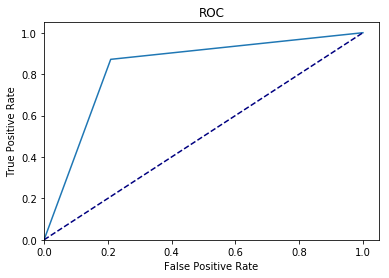

In [16]:
# plot the ROC curve
import matplotlib.pyplot as plt
plt.figure()
# plot the FPR as X-axis and TPR as Y-axis
plt.plot(FPR, TPR)
# plot the minimum line 
plt.plot([0,1], [0,1], color='navy', linestyle = '--')
# set X and Y limits
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
# mention lables for X and Y
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [17]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB_model = MNB.fit(X_train,Y_train.Typeofmushroom)

In [18]:
# apply the model on test
predict2 = MNB_model.predict(X_test)
print (confusion_matrix(Y_test,predict2))
print (classification_report(Y_test,predict2))

[[1144  191]
 [ 230  960]]
             precision    recall  f1-score   support

          0       0.83      0.86      0.84      1335
          1       0.83      0.81      0.82      1190

avg / total       0.83      0.83      0.83      2525



In [19]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB_model = BNB.fit(X_train,Y_train.Typeofmushroom)

In [20]:
# apply the model on test
predict3 = BNB_model.predict(X_test)
print (confusion_matrix(Y_test,predict3))
print (classification_report(Y_test,predict3))

[[1204  131]
 [ 181 1009]]
             precision    recall  f1-score   support

          0       0.87      0.90      0.89      1335
          1       0.89      0.85      0.87      1190

avg / total       0.88      0.88      0.88      2525

